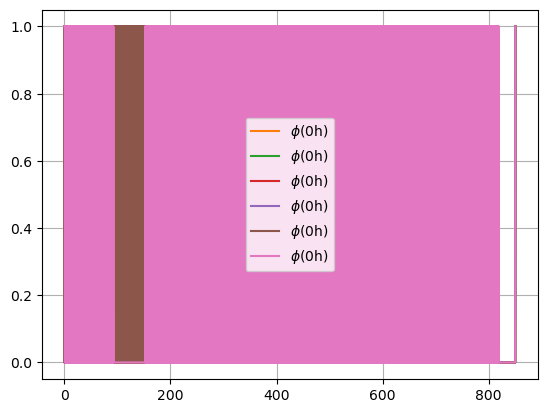

In [12]:

import numpy as np
import matplotlib.pyplot as plt

# func
def func(x):
    """Function"""
    if x < 100.:
        return 1
    elif x> 120:
        return 0.
    else:
        return 1.

# tridiagonal for the system of equations
def tridiagonal(a,b,c,d):
    """
    Tridiagonal matrix algorithm
    a, b, c are matrices for tridiagonal elements
    d is rhs matrix
    """
    n = len(d)
    c1 = np.zeros(n-1)
    d1 = np.zeros(n)
    c1[0] = c[0]/b[0]
    d1[0] = d[0]/b[0]
    for i in range(1, n-1):
        c1[i] = c[i]/(b[i]-a[i]*c1[i-1])
    for i in range(1, n):
        d1[i] = (d[i] - a[i]*d1[i-1])/(b[i] - a[i]*c1[i-1])
    for i in reversed(range(n-1)):
        d1[i] = d1[i] - c1[i]*d1[i+1]
    return d1

# main loop
def diffusion(x0, y0, diaValue):
    # create matrix for Thomas algorithm
    
    sz = len(x0); t = 0
    n = sz - 2
    a = np.ones(n)  * diaValue[0]
    b = np.ones(n)  * diaValue[1]
    c = np.ones(n-1)* diaValue[2]
    d = y0[1:sz-1].copy()
    while t < duration:
        d[0] = d[0] - diaValue[0]*dboundary
        d[n-1] = d[n-1] - diaValue[2]*dboundary
        d = tridiagonal(a,b,c,d)
        if t%tinterval < dt:
            plt.plot(x0, y0, label="$\phi$(" + str(int(np.floor(t/3600))) + "h)")
        y0[1:sz-1] = d[:].copy()
        t = t + dt
    plt.legend()
    plt.grid()

# initial condition
dt = 1; u = 0.55; dx = 0.25 # control vars
# NOTE: no limit of t
dboundary = 1. # dirichlet boundary
tinterval = 200; duration = 1000 + 10 # time
x0 = np.arange(0, 850+dx, dx)
y0 = np.vectorize(func)(x0)
y0[0] = dboundary; y0[-1] = dboundary
# alpha = k*dt/dx**2
lam = dt/dx
diaValue = [-lam*u/2, 1, lam*u/2]

# run
plt.plot(x0, y0)
diffusion(x0, y0, diaValue)
